# Aula 09 (parte 1)

## Exercício 1:

Considere a função abaixo. Esse tipo de função é considerada uma função modificadora pois modifica o objeto que é passado como argumento.


In [1]:
def dobrar_elementos(uma_lista):
    """ Reescreve os elementos de uma_lista com o dobro de seus valores originais.
    """
    for (i, valor) in enumerate(uma_lista):
        novo_elem = 2 * valor
        uma_lista[i] = novo_elem

    return uma_lista

minha_lista = [2, 4, 6]
print(minha_lista)
dobrar_elementos(minha_lista)
print(minha_lista)

[2, 4, 6]
[4, 8, 12]


**A)** Modifique a função para retornar uma nova lista, sem modificar a lista usada como parâmetro. Esse tipo de função é chamado de função pura.

**B)** Modifique a documentação de ajuda da nova função, de tal forma que quando se chame a função help da nova função, se obtenha a descrição adequada.


In [12]:
def dobrar_elementos(uma_lista):
    '''Retorna uma nova lista com o dobro de cada elemento da passada por parâmetro.'''
    return [i * 2 for i in uma_lista]

minha_lista = [2, 4, 6]
print(dobrar_elementos(minha_lista))
print(minha_lista)

help(dobrar_elementos)

[4, 8, 12]
[2, 4, 6]
Help on function dobrar_elementos in module __main__:

dobrar_elementos(uma_lista)
    Retorna uma nova lista com o dobro de cada elemento da passada por parâmetro.



# Aula 09 (parte 2)

## Exercício 1:

Utilizando um arquivo de dados com várias colunas (por exemplo, o arquivo dados_alunos.txt), faça um histograma com os dados de cada uma das colunas. Dica: utilize o matplotlib para fazer os histogramas.


In [79]:
%%writefile dados_alunos.txt
idade,altura,peso
18,1.68,80
18,1.94,60
18,1.7,80
18,1.76,66
19,1.73,87.5
18,1.66,58
21,1.8,92
18,1.6,57
18,1.67,64
18,1.73,57
17,1.73,75
18,1.61,59
18,1.69,90
17,1.71,67
19,1.78,60
22,1.68,72
18,1.7,73
19,1.64,86
18,1.64,75
20,1.8,95
17,1.75,60
18,1.78,75
18,1.75,65
17,1.69,60
19,1.78,73
18,1.7,63
34,1.75,78
18,1.64,64
19,1.75,50
18,1.67,61
18,1.7,70
20,1.8,60
18,1.63,57
23,1.89,110
18,1.71,71
18,1.65,65
17,1.72,67
19,1.65,58
18,1.75,90
18,1.7,64
19,1.81,70
19,1.65,43
28,1.52,50
19,1.79,78
26,1.79,82
19,1.75,61
19,1.8,70
20,1.75,70
20,1.73,70
19,1.7,50
22,1.78,72
19,1.77,55
18,1.53,58
28,1.54,50
20,1.83,70
44,1.85,90
18,1.6,51

Overwriting dados_alunos.txt



Dados: [['idade', 'altura', 'peso'], ['18', '1.68', '80'], ['18', '1.94', '60'], ['18', '1.7', '80'], ['18', '1.76', '66'], ['19', '1.73', '87.5'], ['18', '1.66', '58'], ['21', '1.8', '92'], ['18', '1.6', '57'], ['18', '1.67', '64'], ['18', '1.73', '57'], ['17', '1.73', '75'], ['18', '1.61', '59'], ['18', '1.69', '90'], ['17', '1.71', '67'], ['19', '1.78', '60'], ['22', '1.68', '72'], ['18', '1.7', '73'], ['19', '1.64', '86'], ['18', '1.64', '75'], ['20', '1.8', '95'], ['17', '1.75', '60'], ['18', '1.78', '75'], ['18', '1.75', '65'], ['17', '1.69', '60'], ['19', '1.78', '73'], ['18', '1.7', '63'], ['34', '1.75', '78'], ['18', '1.64', '64'], ['19', '1.75', '50'], ['18', '1.67', '61'], ['18', '1.7', '70'], ['20', '1.8', '60'], ['18', '1.63', '57'], ['23', '1.89', '110'], ['18', '1.71', '71'], ['18', '1.65', '65'], ['17', '1.72', '67'], ['19', '1.65', '58'], ['18', '1.75', '90'], ['18', '1.7', '64'], ['19', '1.81', '70'], ['19', '1.65', '43'], ['28', '1.52', '50'], ['19', '1.79', '78'], 

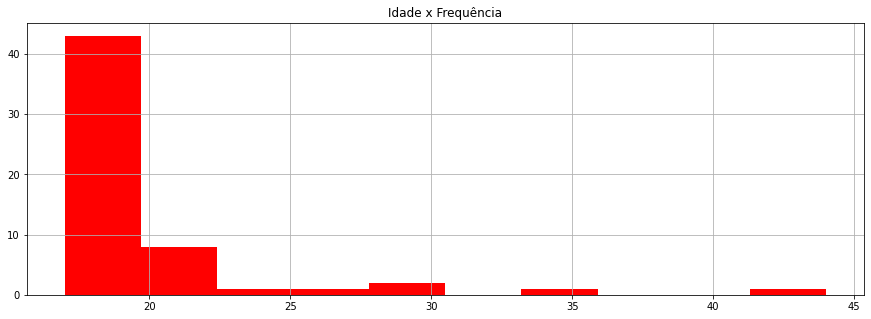

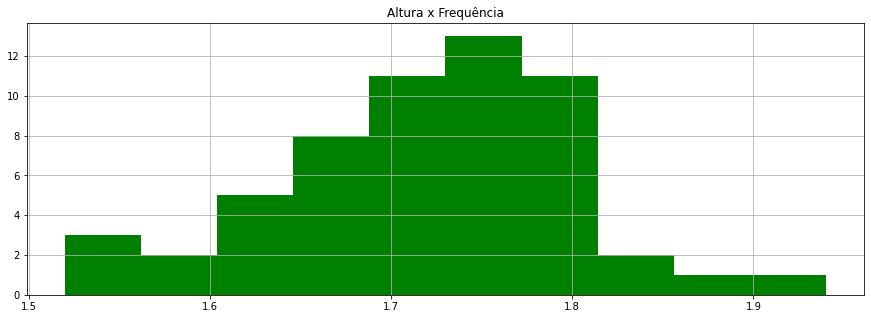

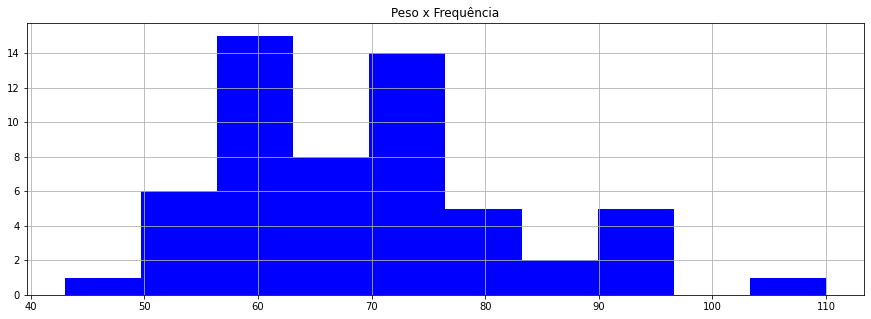

In [82]:
import matplotlib.pyplot as plt

# Functions:
def open_data(data_file, separator = ','):
    ''' Retorna listas de dados separados pelo parâmetro "separator". '''
    lines = open(data_file).readlines()
    return [line.strip().lower().split(separator) for line in lines]

def create_list(data, item):
    ''' Retorna uma lista a partir dos dados do parâmetro "data", de um item em especifico informado no parâmetro "item". '''
    item = item.strip().lower()
    if item in data[0]:
        new_list = []
        position = data[0].index(item)
        for i in data:
            new_list.append(i[position])
        return [float(i) for i in new_list[1:]]
    else:
        return 'Não existe dados sobre este item.'

def plot_histogram(title, data_list, color, bins = 10):
    ''' Cria um histograma com titulo, dados, cor e número de intervalos. '''
    plt.figure(figsize = (15, 5))
    plt.title(title)
    plt.hist(data_list, bins = bins, color = color)
    plt.grid(True)
    plt.show()

# Parameters:
data = open_data('dados_alunos.txt')
idade = create_list(data, 'idade')
altura = create_list(data, 'altura')
peso = create_list(data, 'peso')
idade.sort(key = int)
altura.sort(key = float)
peso.sort(key = float)

# Results:
print('\nDados:', data, '\n')
print('Idades: ', idade, '\n')
print('Alturas: ', altura, '\n')
print('Pesos: ', peso, '\n')

# Plot:
plot_histogram('Idade x Frequência', idade, 'red')
plot_histogram('Altura x Frequência', altura, 'green')
plot_histogram('Peso x Frequência', peso, 'blue')


## Exercício 2:

Estude os métodos do módulo os e faça um script que liste todos os arquivos de um dado diretório assim como de seus subdiretórios. Dica: use o método walk.


In [63]:
import os

# Functions:
def create_dir_list(dir, show = 'all'):
    ''' Cria uma lista de arquivos ou de subpastas ou de ambos de um determinado diretório, dependendo do que for passado no parâmetro "show". Podendo ser "all", "folders" e "files". '''
    folders = []
    files = []
    for i in os.walk(dir):
        if i[1] != []:
            for j in i[1]:
                folders.append(j)
        if i[2] != []:
            for j in i[2]:
                files.append(j)
    if show == 'folders':
        return folders
    elif show == 'files':
        return files
    else:
        all = folders
        all.extend(files)
        return all

# Parameters:
dir = './'

# Results:
print('Subpastas: ', create_dir_list(dir, show = 'folders'), '\n')
print('Arquivos: ', create_dir_list(dir, show = 'files'), '\n')
print('Tudo: ', create_dir_list(dir))

Subpastas:  ['.config', '__pycache__', 'sample_data', 'logs', 'configurations', '2021.05.06'] 

Arquivos:  ['dados_alunos.txt', 'lcount.py', 'read_data.py', 'gce', '.last_survey_prompt.yaml', '.last_update_check.json', 'active_config', '.last_opt_in_prompt.yaml', 'config_sentinel', '13.43.39.026092.log', '13.44.01.543195.log', '13.43.04.692209.log', '13.43.23.909017.log', '13.43.44.620859.log', '13.44.00.991142.log', 'config_default', 'read_data.cpython-37.pyc', 'lcount.cpython-37.pyc', 'anscombe.json', 'README.md', 'california_housing_test.csv', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_train.csv'] 

Tudo:  ['.config', '__pycache__', 'sample_data', 'logs', 'configurations', '2021.05.06', 'dados_alunos.txt', 'lcount.py', 'read_data.py', 'gce', '.last_survey_prompt.yaml', '.last_update_check.json', 'active_config', '.last_opt_in_prompt.yaml', 'config_sentinel', '13.43.39.026092.log', '13.44.01.543195.log', '13.43.04.692209.log', '13.43.23.909017.log', '13.43.44.6208

## Exercício 3:

Reescreva o script dessa aula, lcount.py na forma de uma módulo. Qual o valor da variável __name__ quando o módulo é importado?


In [46]:
%%writefile lcount.py

def linecount(filename):
    count = 0
    for line in open(filename):
        count += 1
    return count

linecount('lcount.py')

Overwriting lcount.py


In [48]:
import lcount

print(__name__)

__main__


## Exercício 4:

Escreva uma função chamada ler_arquivos que tome como argumento um nome de arquivo, leia um arquivo com um número qualquer de colunas e retorne um dicionário que tenha como keys os números das colunas e como valor uma lista dos valores associados a cada coluna do arquivo. Use o arquivo dados_alunos.txt. Caso o arquivo tiver o cabeçalho das colunas, p.ex. dados_alunos_cabecalho.txt, a key deve ser a palavra do cabeçalho.

* Caso não queria usar dicionários, você pode pensar em uma estrutura de dados alternativa para armazenar os dados do arquivo, como por exemplo uma ou mais listas.

* Também pode usar funções já existentes nos módulos de Python numpy ou pandas para ler arquivos de texto e armazenar nas estruturas desses módulos (DataFrames ou arrays).

* Adapte a função acima para, se ocorrer um erro ao abrir, ler ou fechar arquivos, o programa capturar a exceção, imprimir uma mensagem de erro e sair.


In [88]:
# Functions:
def ler_arquivos(data_file, separator = ','):
    ''' Retorna listas de dados separados pelo parâmetro "separator". '''
    try:
        lines = open(data_file).readlines()
        return [line.strip().lower().split(separator) for line in lines]
    except:
        return 'O arquivo não existe!'

def create_list(data, item):
    ''' Retorna uma lista a partir dos dados do parâmetro "data", de um item em especifico informado no parâmetro "item". '''
    item = item.strip().lower()
    if item in data[0]:
        new_list = []
        position = data[0].index(item)
        for i in data:
            new_list.append(i[position])
        return [float(i) for i in new_list[1:]]
    else:
        return 'Não existe dados sobre este item.'

# Parameters:
data = ler_arquivos('dados_alunos.txt')
idade = create_list(data, 'idade')
altura = create_list(data, 'altura')
peso = create_list(data, 'peso')

# Results:
print('\nDados:', data, '\n')
print('Idades: ', idade, '\n')
print('Alturas: ', altura, '\n')
print('Pesos: ', peso, '\n')



Dados: [['idade', 'altura', 'peso'], ['18', '1.68', '80'], ['18', '1.94', '60'], ['18', '1.7', '80'], ['18', '1.76', '66'], ['19', '1.73', '87.5'], ['18', '1.66', '58'], ['21', '1.8', '92'], ['18', '1.6', '57'], ['18', '1.67', '64'], ['18', '1.73', '57'], ['17', '1.73', '75'], ['18', '1.61', '59'], ['18', '1.69', '90'], ['17', '1.71', '67'], ['19', '1.78', '60'], ['22', '1.68', '72'], ['18', '1.7', '73'], ['19', '1.64', '86'], ['18', '1.64', '75'], ['20', '1.8', '95'], ['17', '1.75', '60'], ['18', '1.78', '75'], ['18', '1.75', '65'], ['17', '1.69', '60'], ['19', '1.78', '73'], ['18', '1.7', '63'], ['34', '1.75', '78'], ['18', '1.64', '64'], ['19', '1.75', '50'], ['18', '1.67', '61'], ['18', '1.7', '70'], ['20', '1.8', '60'], ['18', '1.63', '57'], ['23', '1.89', '110'], ['18', '1.71', '71'], ['18', '1.65', '65'], ['17', '1.72', '67'], ['19', '1.65', '58'], ['18', '1.75', '90'], ['18', '1.7', '64'], ['19', '1.81', '70'], ['19', '1.65', '43'], ['28', '1.52', '50'], ['19', '1.79', '78'], 

## Exercício 5:

Adapte o script acima para ser um módulo.


In [84]:
%%writefile read_data.py

def ler_arquivos(data_file, separator = ','):
    ''' Retorna listas de dados separados pelo parâmetro "separator". '''
    try:
        lines = open(data_file).readlines()
        return [line.strip().lower().split(separator) for line in lines]
    except:
        return 'O arquivo não existe!'

def create_list(data, item):
    ''' Retorna uma lista a partir dos dados do parâmetro "data", de um item em especifico informado no parâmetro "item". '''
    item = item.strip().lower()
    if item in data[0]:
        new_list = []
        position = data[0].index(item)
        for i in data:
            new_list.append(i[position])
        return [float(i) for i in new_list[1:]]
    else:
        return 'Não existe dados sobre este item.'

Overwriting read_data.py


## Exercício 6:

Escreva um script que importe o módulo criado acima e faça um histograma para cada coluna do arquivo, com seus respectivos valores. Use o dicionário ou a estrutura de dados criada no exercício 1.


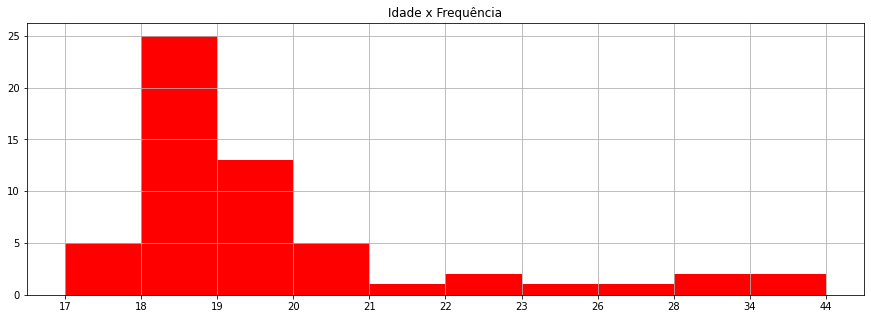

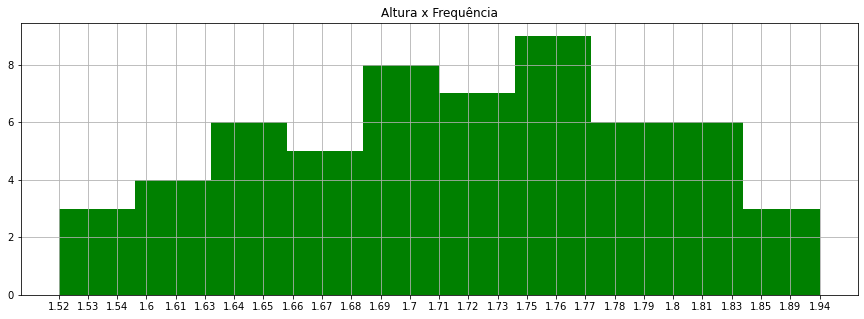

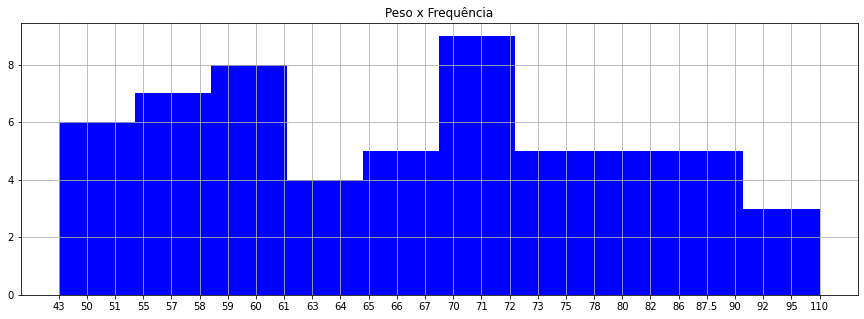

In [85]:
import read_data

def plot_histogram(title, data_list, color, bins = 10):
    ''' Cria um histograma com titulo, dados, cor e número de intervalos. '''
    plt.figure(figsize = (15, 5))
    plt.title(title)
    plt.hist(data_list, bins = bins, color = color)
    plt.grid(True)
    plt.show()

# Parameters:
data = read_data.ler_arquivos('dados_alunos.txt')
idade = read_data.create_list(data, 'idade')
altura = read_data.create_list(data, 'altura')
peso = read_data.create_list(data, 'peso')
idade.sort(key = int)
altura.sort(key = float)
peso.sort(key = float)

# Plot:
plot_histogram('Idade x Frequência', idade, 'red')
plot_histogram('Altura x Frequência', altura, 'green')
plot_histogram('Peso x Frequência', peso, 'blue')


## Exercício 7:

Adicione uma função ao script criado em 6), que calcule o desvio padrão amostral, desvio padrão populacional e média de cada distribuição representada nos histogramas acima. Para tal, use o módulo statistics do Python ou outro módulo de Python (numpy, scipy).


In [92]:
from statistics import mean, pstdev, stdev

def info(itens):
    ''' Imprime os dados, média, desvio padrão amostral e desvio padrão populacional de uma lista. '''
    print('Dados:', itens)
    print('Média:', mean(itens))
    print('Desvio padrão amostral:', stdev(itens))
    print('Desvio padrão populacional:', pstdev(itens), '\n')

info(idade)
info(altura)
info(peso)

Dados: [18.0, 18.0, 18.0, 18.0, 19.0, 18.0, 21.0, 18.0, 18.0, 18.0, 17.0, 18.0, 18.0, 17.0, 19.0, 22.0, 18.0, 19.0, 18.0, 20.0, 17.0, 18.0, 18.0, 17.0, 19.0, 18.0, 34.0, 18.0, 19.0, 18.0, 18.0, 20.0, 18.0, 23.0, 18.0, 18.0, 17.0, 19.0, 18.0, 18.0, 19.0, 19.0, 28.0, 19.0, 26.0, 19.0, 19.0, 20.0, 20.0, 19.0, 22.0, 19.0, 18.0, 28.0, 20.0, 44.0, 18.0]
Média: 19.82456140350877
Desvio padrão amostral: 4.452618840226598
Desvio padrão populacional: 4.413387953566483 

Dados: [1.68, 1.94, 1.7, 1.76, 1.73, 1.66, 1.8, 1.6, 1.67, 1.73, 1.73, 1.61, 1.69, 1.71, 1.78, 1.68, 1.7, 1.64, 1.64, 1.8, 1.75, 1.78, 1.75, 1.69, 1.78, 1.7, 1.75, 1.64, 1.75, 1.67, 1.7, 1.8, 1.63, 1.89, 1.71, 1.65, 1.72, 1.65, 1.75, 1.7, 1.81, 1.65, 1.52, 1.79, 1.79, 1.75, 1.8, 1.75, 1.73, 1.7, 1.78, 1.77, 1.53, 1.54, 1.83, 1.85, 1.6]
Média: 1.7175438596491228
Desvio padrão amostral: 0.08261962543043672
Desvio padrão populacional: 0.08189168502559452 

Dados: [80.0, 60.0, 80.0, 66.0, 87.5, 58.0, 92.0, 57.0, 64.0, 57.0, 75.0, 59.